# Introduction to Machine Learning
## Lecture 4 - Logistic Discrimination
### Notebook 2: Understanding The Logistic Discriminant
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(
    n_samples=1000, n_features=2, centers=2, 
    center_box=(3, 15), cluster_std=1, random_state=42,
)

Visualize the class distributions of the dataset

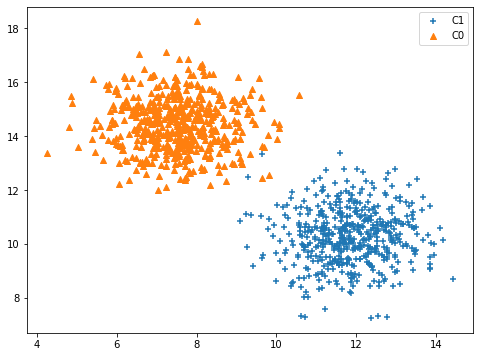

In [4]:
ones = X[y==1]
zeros = X[y==0]

plt.figure(figsize=(8, 6))
plt.scatter(ones[:, 0], ones[:, 1], marker="+", label="C1")
plt.scatter(zeros[:, 0], zeros[:, 1], marker="^", label="C0")
plt.legend()
plt.show()

In [5]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True, 
    random_state=42, stratify=y,
)

# Logistic Discrimination using Logistic Regression

We will utilize an existing logistic discriminant model in scikit-learn: **Logistic Regression Classifier.**

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# Define a model
logi = LogisticRegression(C=1e-4, max_iter=20, warm_start=False, random_state=42)

# Train the model
logi.fit(X_train, y_train)

# Make predictions
train_pred = logi.predict(X_train)
test_pred = logi.predict(X_test)

# Calculate the accuracy
train_acc = np.sum(y_train==train_pred) / y_train.shape[0]
test_acc = np.sum(y_test==test_pred) / y_test.shape[0]

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Training Accuracy: 0.997
Test Accuracy: 1.000


Display the coefficients of the model after training

In [8]:
print(f"W1 and W2: {logi.coef_}")
print(f"W0: {logi.intercept_}")

W1 and W2: [[ 0.06406649 -0.06241306]]
W0: [0.15020292]


Visualize the classification: We will draw a **decision boundary** to see how well we performed classification.

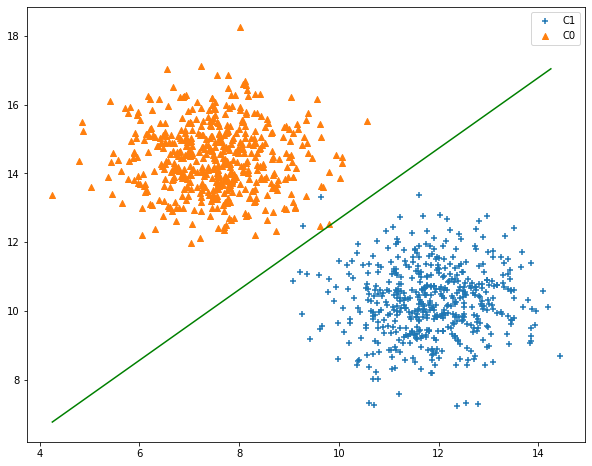

In [9]:
# Define the parameters of the decision boundary (separating hyperplane): y = ax + b
W1 = logi.coef_[0, 0]
W2 = logi.coef_[0, 1]
W0 = logi.intercept_[0]

x_hat = np.arange(np.min(X[:, 0]), np.max(X[:, 0]))
y_hat = -(np.dot(x_hat, W1) + W0) / W2

plt.figure(figsize=(10, 8))
plt.scatter(ones[:, 0], ones[:, 1], marker="+", label="C1")
plt.scatter(zeros[:, 0], zeros[:, 1], marker="^", label="C0")
plt.plot(x_hat, y_hat, c="g")
plt.legend()
plt.show()

**Discussion:** We only make two misclassification. Recall that our hypothesis is a linear function. Therefore, the decision boundary is a linear line that separates the classes.

# END